In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil
import pickle
import glob

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
train = TabularDataset(train)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=train,
    time_limit=3600 * 11,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    save_space=False,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
#     feature_prune_kwargs={"force_prune": True}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240525_090501"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 39600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240525_090501/ds_sub_fit/sub_fit_ho.
2024-05-25 09:05:02,080	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[16]	valid_set's l2: 0.000862891	valid_set's r2: -81.2859
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.000806328	valid_set's r2: -81.295
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00132578	valid_set's r2: -81.6226
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107894	valid_set's r2: -81.1725
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[11]	valid_set's l2: 0.00108464	valid_set's r2: -80.7535
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[11]	valid_set's l2: 0.00107812	valid_set's r2: -81.2311
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107633	valid_set's r2: -81.4051
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[11]	valid_set's l2: 0.00107724	valid_set's r2: -81.1855
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[11]	valid_set's l2: 0.00107703	valid_set's r2: -81.426
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[11]	valid_set's l2: 0.00107409	valid_set's r2: -81.5317
	Ran out of time, early 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 19.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 24.
	Ran out of time, early stopping on iteration 25.
	Ran out of time, early stopping on iteration 26.
	Ran out of time, early stopping on iteration 27.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 37.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.787	 = Validation score   (r2)
	83.91s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 92.73s of the 9577.34s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 92.73s of the 9472.28s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238101	valid_set's r2: -90.9431
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229731	valid_set's r2: -90.137
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238127	valid_set's r2: -91.034
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256818	valid_set's r2: -94.5587
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteratio

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237529	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229043	valid_set's r2: -89.8913
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237564	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256749	valid_set's r2: -94.5587
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 28.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2398	 = Validation score   (r2)
	66.38s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 75.7s of the 4875.36s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogl

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 75.7s of the 4760.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00246178	valid_set's r2: -94.4817
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 75.7s of the 4746.61s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 81. Best iteration is:
	[62]	valid_set's l2: 0.00036702	valid_set's r2: -80.6802
	Ran out of time, early stopping on iteration 85. Best iteration is:
	[85]	valid_set's l2: 0.000358125	valid_set's r2: -81.0447
	Ran out of time, early stopping on iteration 87. Best iteration is:
	[86]	valid_set's l2: 0.000355794	valid_set's r2: -80.978
	Ran out of time, early stopping on iteration 91. Best iteration is:
	[91]	valid_set's l2: 0.000358021	valid_set's r2: -81.2435
	Ran out of time, early stopping on iteration 95. Best iteration is:
	[95]	valid_set's l2: 0.000358784	valid_set's r2: -81.43
	Ran out of time, early stopping on iteration 100. Best iteration is:
	[99]	valid_set's l2: 0.000355951	valid_set's r2: -81.6324
	Ran out of time, early stopping on iteration 107. Best iteration is:
	[106]	valid_set's l2: 0.000356031	valid_set's r2: -81.8356
	Ran out of time,

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	156.66s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 294.17s of the 30931.21s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, an

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 80.
	Ran out of time, early stopping on iteration 84.
	Ran out of time, early stopping on iteration 87.
	Ran out of time, early stopping on iteration 91.
	Ran out of time, early stopping on iteration 96.
	Ran out of time, early stopping on iteration 101.
	Ran out of time, early stopping on iteration 113.
	Ran out of time, early stopping on iteration 141.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8659	 = Validation score   (r2)
	275.98s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 294.17s of the 30609.48s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8676	 = Validation score   (r2)
	3

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8503	 = Validation score   (r2)
	279.09s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 294.17s of the 30011.56s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6213	 = Validation score   (r2)
	228.64s	 = Training   runtime
	1.83s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 294.17s of the 29779.27s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 161.
	Ran out of time, early stopping on iteration 167

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 25. Best iteration is:
	[25]	valid_set's l2: 0.00052865	valid_set's r2: -81.3322
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[19]	valid_set's l2: 0.000495946	valid_set's r2: -81.3344
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[14]	valid_set's l2: 0.00089716	valid_set's r2: -81.4191
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00236751	valid_set's r2: -90.8061
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[13]	valid_set's l2: 0.000937392	valid_set's r2: -81.3317
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[10]	valid_set's l2: 0.000870445	valid_set's r2: -81.3317
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.00133758	valid_set's r2: -81.5929
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00246556	valid_set's r2: -94.4347
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 30.
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 34.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 40.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8272	 = Validation score   (r2)
	225.96s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 237.03s of the 15410.0s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packag

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 237.03s of the 15120.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15. Best iter

In [7]:
X_train = train.drop('FloodProbability', axis=1)
y_train = train['FloodProbability']

y_preds = predictor.predict(X_train)

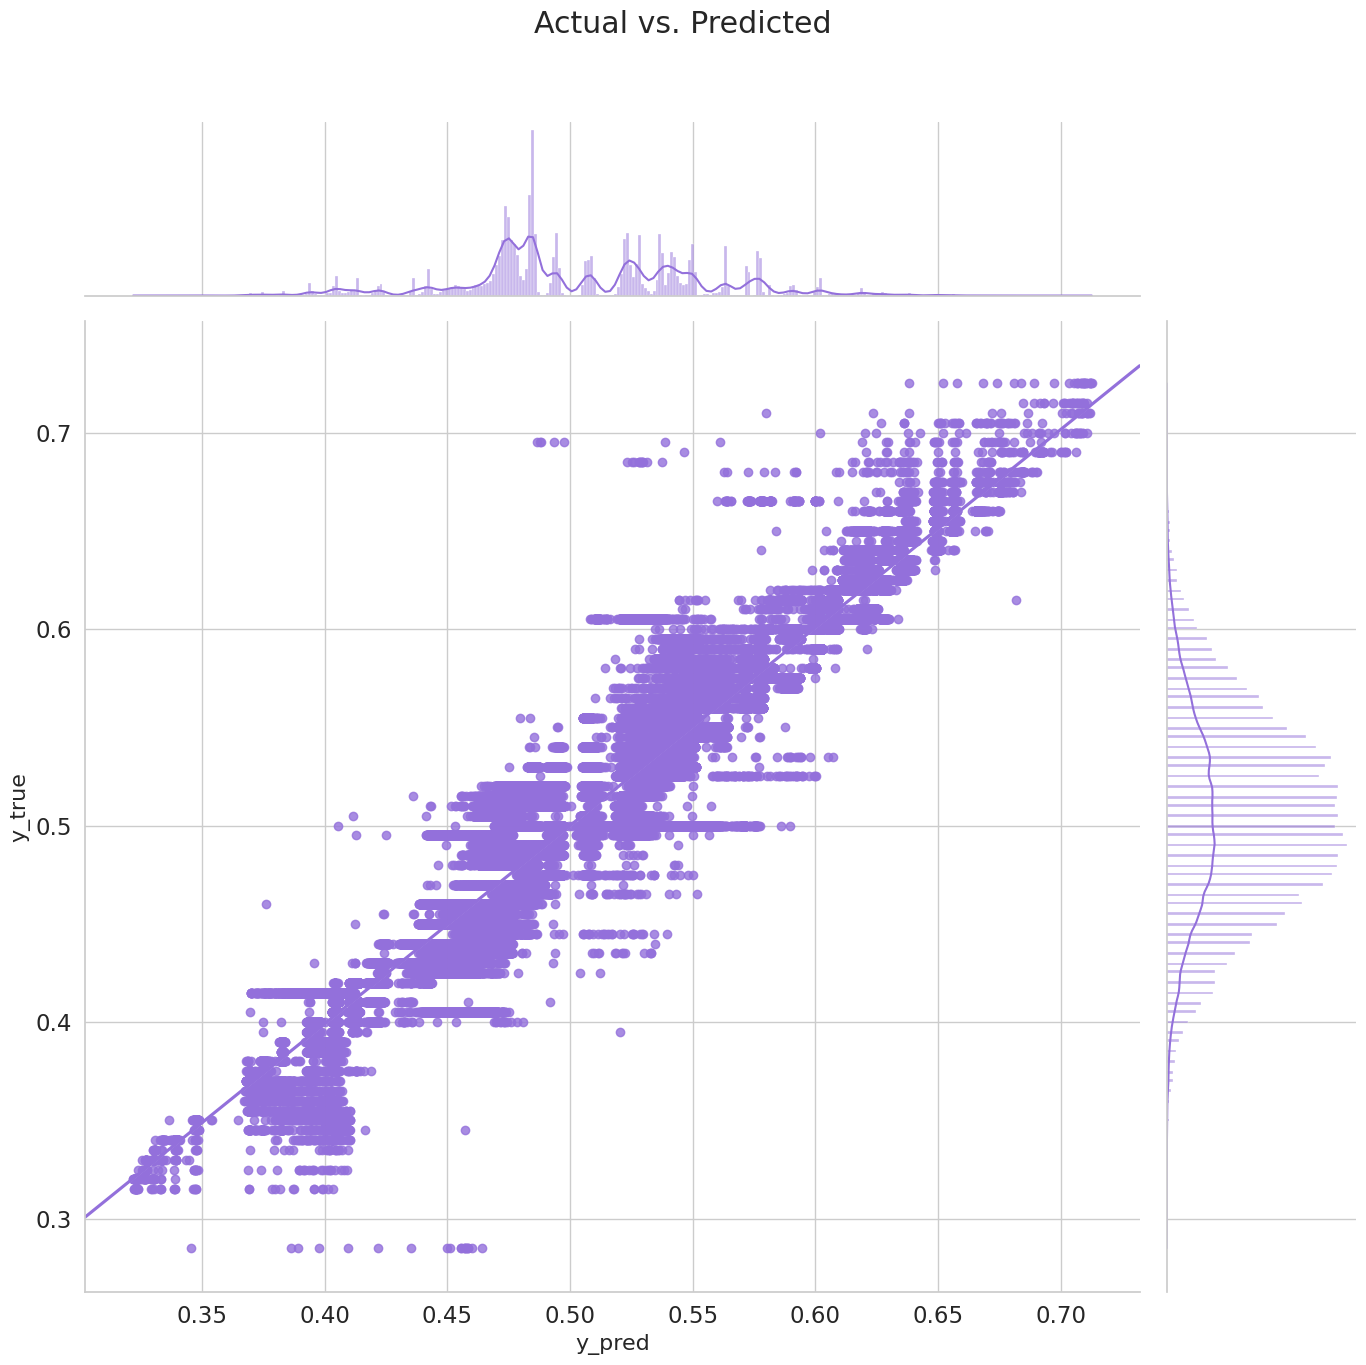

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

## Selected Features
I set `feature_prune_kwargs={"force_prune": True}` in the `fit` method. Here I'm printing out the features that AutoGluon selected, as well as those that it decided to dropped.

In [9]:
model_path = glob.glob("/kaggle/working/AutogluonModels/**/**/**/model.pkl")[0]
with open(model_path, 'rb') as f:
    model = pickle.load(f)

selected_features = model.features
unused_features = [col for col in train.columns if col not in selected_features and col != "FloodProbability"]

print("Unused Features:", unused_features)
print("\nSelected Features:", selected_features)

Unused Features: ['_sort_19', '_50th', '_cnt19', '_cnt22']

Selected Features: ['MonsoonIntensity', 'Urbanization', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'IneffectiveDisasterPreparedness', 'CoastalVulnerability', 'DeterioratingInfrastructure', 'WetlandLoss', 'InadequatePlanning', '_sum', '_sum_log', '_mean', '_median', '_max', '_var', '_skew', '_kurtosis', '_25th', '_75th', '_hmean', '_gmean', '_2nd_moment', '_3rd_moment', '_entropy', '_special1', '_sort_0', '_sort_1', '_sort_2', '_sort_3', '_sort_4', '_sort_8', '_sort_10', '_sort_11', '_sort_12', '_sort_13', '_sort_14', '_sort_15', '_sort_16', '_sort_17', '_sort_18', '_20th', '_60th', '_70th', '_80th', '_90th', '_cnt0', '_cnt2', '_cnt3', '_cnt4', '_cnt5', '_cnt6', '_cnt7', '_cnt9', '_cnt10', '_cnt11', '_cnt13', '_cnt14', '_cnt15', '_cnt18']


# Making Predictions and Creating a Submission File

In [10]:
# Used for ensembling with other models
oof_predictions = predictor.get_oof_pred_proba()
with open('autogluon_oof_preds.pkl', 'wb') as f:
    pickle.dump(oof_predictions, f)

In [11]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [12]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv('autogluon.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577927
1117958,1117958,0.455421
1117959,1117959,0.448557
1117960,1117960,0.466396
1117961,1117961,0.466082


In [13]:
shutil.rmtree("AutogluonModels")